## 전처리

(1) 표준화(Standardization) : :데이터가 평균으로부터 얼마나 떨어져 있는지를 나타내는 값으로, 특정 범위를 벗어난 데이터를 이상치(outlier)로 간주하여 제거한다, StandardScaler 사용, Z = (X - mean())/std()

(2) 정규화(Normalization) : 데이터의 범위를 일치시키거나 분포를 유사하게 만들어 주는 기능, 데이터의 범위를 0~1 사이의 값으로 변환, MinMaxScaler 사용 , Z = (X - min())/(max() - min())

### 데이터 분석 절차
- 데이터 표준화를 통해 outlier를 제거하고, 그 다음에 데이터 정규화를 하여 상대적 크기의 영향력 줄인 다음 분석을 시작한다

In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

data = np.random.randint(1000,size=(3,4)) # 0 ~ 999까지의 정수
print('raw_data:\n',data)

data_stand_np = ( data - np.mean(data,axis = 0))/ np.std(data,axis = 0)
print('numpy standardized data:\n',data_stand_np)

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


raw_data:
 [[400 736 626 290]
 [  1 928 815 487]
 [515 783 932  60]]
numpy standardized data:
 [[ 0.42979913 -0.97491756 -1.30878208  0.06303889]
 [-1.3817134   1.37467455  0.1903683   1.19200807]
 [ 0.95191427 -0.39975699  1.11841378 -1.25504696]]


In [2]:
# (2) scipy.stats 를 이용한 표준화 : zscore()
import scipy.stats as ss

data_stand_ss = ss.zscore(data)
print('scipy standardized data:\n',data_stand_ss)

scipy standardized data:
 [[ 0.42979913 -0.97491756 -1.30878208  0.06303889]
 [-1.3817134   1.37467455  0.1903683   1.19200807]
 [ 0.95191427 -0.39975699  1.11841378 -1.25504696]]


In [3]:
# (3) sklearn.preprocessing 를 이용한 표준화
# StandardScaler().fit_transform()

from sklearn.preprocessing import StandardScaler

data_stand_skl = StandardScaler().fit_transform(data)
print('sklearn standardized data:\n',data_stand_skl)

# 동일한 구현
sc =  StandardScaler()  # 클래스의 인스턴스 생성
sc.fit(data)    
data_stand_skl = sc.transform(data)
print('sklearn standardized data:\n',data_stand_skl)

sklearn standardized data:
 [[ 0.42979913 -0.97491756 -1.30878208  0.06303889]
 [-1.3817134   1.37467455  0.1903683   1.19200807]
 [ 0.95191427 -0.39975699  1.11841378 -1.25504696]]
sklearn standardized data:
 [[ 0.42979913 -0.97491756 -1.30878208  0.06303889]
 [-1.3817134   1.37467455  0.1903683   1.19200807]
 [ 0.95191427 -0.39975699  1.11841378 -1.25504696]]


In [4]:
# 정규화 : 0 ~ 1
# (1) Numpy 를 이용한 정규화
# Z = (X - min())/(max() - min())
data_minmax_np = (data - np.min(data,axis = 0))/(np.max(data,axis = 0) - np.min(data,axis = 0))
print('numpy minmax data:\n',data_minmax_np)

numpy minmax data:
 [[0.77626459 0.         0.         0.53864169]
 [0.         1.         0.61764706 1.        ]
 [1.         0.24479167 1.         0.        ]]


In [6]:
# (2) sklearn.preprocessing를 이용한 정규화
# MinMaxScaler().fit_transform()
from sklearn.preprocessing import MinMaxScaler

data_minmax_skl = MinMaxScaler().fit_transform(data)
print('sklearn minmax data:\n',data_minmax_skl)

# 동일한 구현
sc = MinMaxScaler()
sc.fit(data)
data_minmax_skl = sc.transform(data)
print('sklearn minmax data:\n',data_minmax_skl)

sklearn minmax data:
 [[0.77626459 0.         0.         0.53864169]
 [0.         1.         0.61764706 1.        ]
 [1.         0.24479167 1.         0.        ]]
sklearn minmax data:
 [[0.77626459 0.         0.         0.53864169]
 [0.         1.         0.61764706 1.        ]
 [1.         0.24479167 1.         0.        ]]


### 이상치를 제거하여 표준화 하기

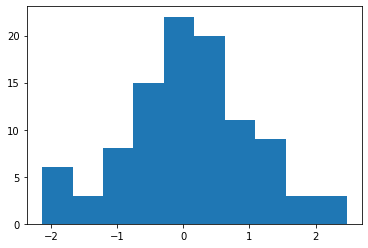

In [7]:
np.random.seed(10)
data = np.random.randn(100)  # 정규분포를 이루는 random, 100개
plt.hist(data)  # 정규성이 있다
plt.show()

-2.131712108481604 100.0


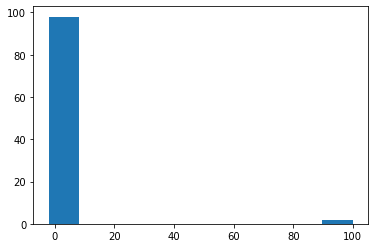

In [8]:
data[98:100] = 100
print(np.min(data),np.max(data))
plt.hist(data)  # 정규성이 없다
plt.show()

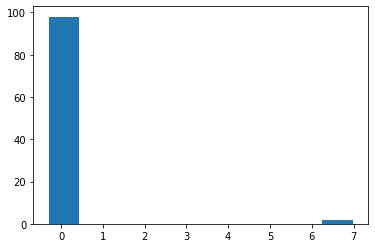

In [9]:
data = data.reshape(-1,1) # 반드시 2차원으로 변경하여 사용, (100,1)
data_stand_skl = StandardScaler().fit_transform(data)
plt.hist(data_stand_skl)
plt.show()

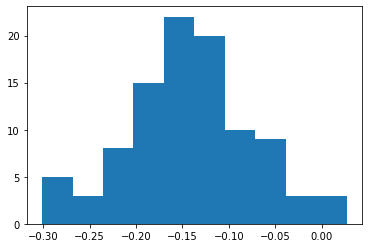

In [10]:
data_stand_skl_zoomin = data_stand_skl[data_stand_skl < 5]
plt.hist(data_stand_skl_zoomin) # 정규성이 있다
plt.show()

In [11]:
# 레이블 인코딩(Label Encoding)
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','믹서','선풍기','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('encoding 변환 값:',labels)

encoding 변환 값: [0 1 4 5 3 2 3 2]


In [12]:
print('encoding 클래스:',encoder.classes_)

encoding 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [13]:
print('decoding 원본 값:',encoder.inverse_transform([0,1,3,5,4,2,4,5]))

decoding 원본 값: ['TV' '냉장고' '선풍기' '컴퓨터' '전자렌지' '믹서' '전자렌지' '컴퓨터']
